In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

In [2]:
set.seed(42)

In [3]:
proj <- loadArchRProject("../data/snATAC", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
table(proj@cellColData$Sample)


CK166 CK167 CK168 CK170 CK171 CK173 CK336 CK337 CK338 CK339 CK340 CK343 CK344 
  378   435   122   519   590   115   138   127   156   566  1003   116   186 
CK346 CK351 CK353 CK354 CK380 CK382 CK383 CK385 CK386 CK387 CK388 CK389 
  147   122   178   192   115   232   105   135   101   204   333   180 

In [5]:
df_sample_annotation <- read.csv("../../../snATAC/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK166,control,P1,control_P1,group_1
2,CK170,FZ/GT,P4,FZ/GT_P4,group_3
3,CK174,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK171,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK169,IZ,P3,IZ_P3,group_2
6,CK168,RZ/BZ,P3,RZ/BZ_P3,group_1


In [6]:
proj@cellColData$region <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_region)
proj@cellColData$patient <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient)
proj@cellColData$patient_region_id <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_region)
proj@cellColData$patient_group <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_group)

In [7]:
proj <- addIterativeLSI(
    ArchRProj = proj,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-2a84875ed46ab-Date-2021-11-16_Time-19-52-26.log
If there is an issue, please report to github with logFile!

2021-11-16 19:52:28 : Computing Total Across All Features, 0.014 mins elapsed.

2021-11-16 19:52:33 : Computing Top Features, 0.108 mins elapsed.

###########
2021-11-16 19:52:34 : Running LSI (1 of 3) on Top Features, 0.124 mins elapsed.
###########

2021-11-16 19:52:34 : Creating Partial Matrix, 0.124 mins elapsed.

2021-11-16 19:52:58 : Computing LSI, 0.513 mins elapsed.

2021-11-16 19:53:10 : Identifying Clusters, 0.715 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
2021-11-16 19:53:21 : Identified 3 Clusters, 0.895 mins elapsed.

2021-11-16 19:53:21 : Saving LSI Iteration, 0.896 mins elapsed.

Length of unique values greater than palette, interpolating..

2021-11-16 19:53:40 : Creating Cluster Matrix on the total Group Features, 1.215 mins elapsed.

2021-11-16 19:54:43 

In [8]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

19:58:11 Creating temp model dir /tmp/RtmpDUiz0E/dir2a84877909277f

19:58:11 Creating dir /tmp/RtmpDUiz0E/dir2a84877909277f

19:58:12 Changing to /tmp/RtmpDUiz0E/dir2a84877909277f

19:58:12 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Endothelial/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-2a84876d5a9393-Date-2021-11-16_Time-19-58-11.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84875ef375a9-Date-2021-11-16_Time-19-58-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a84875ef375a9-Date-2021-11-16_Time-19-58-25.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a848774e27de7-Date-2021-11-16_Time-19-58-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a848774e27de7-Date-2021-11-16_Time-19-58-25.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84872e093602-Date-2021-11-16_Time-19-58-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a84872e093602-Date-2021-11

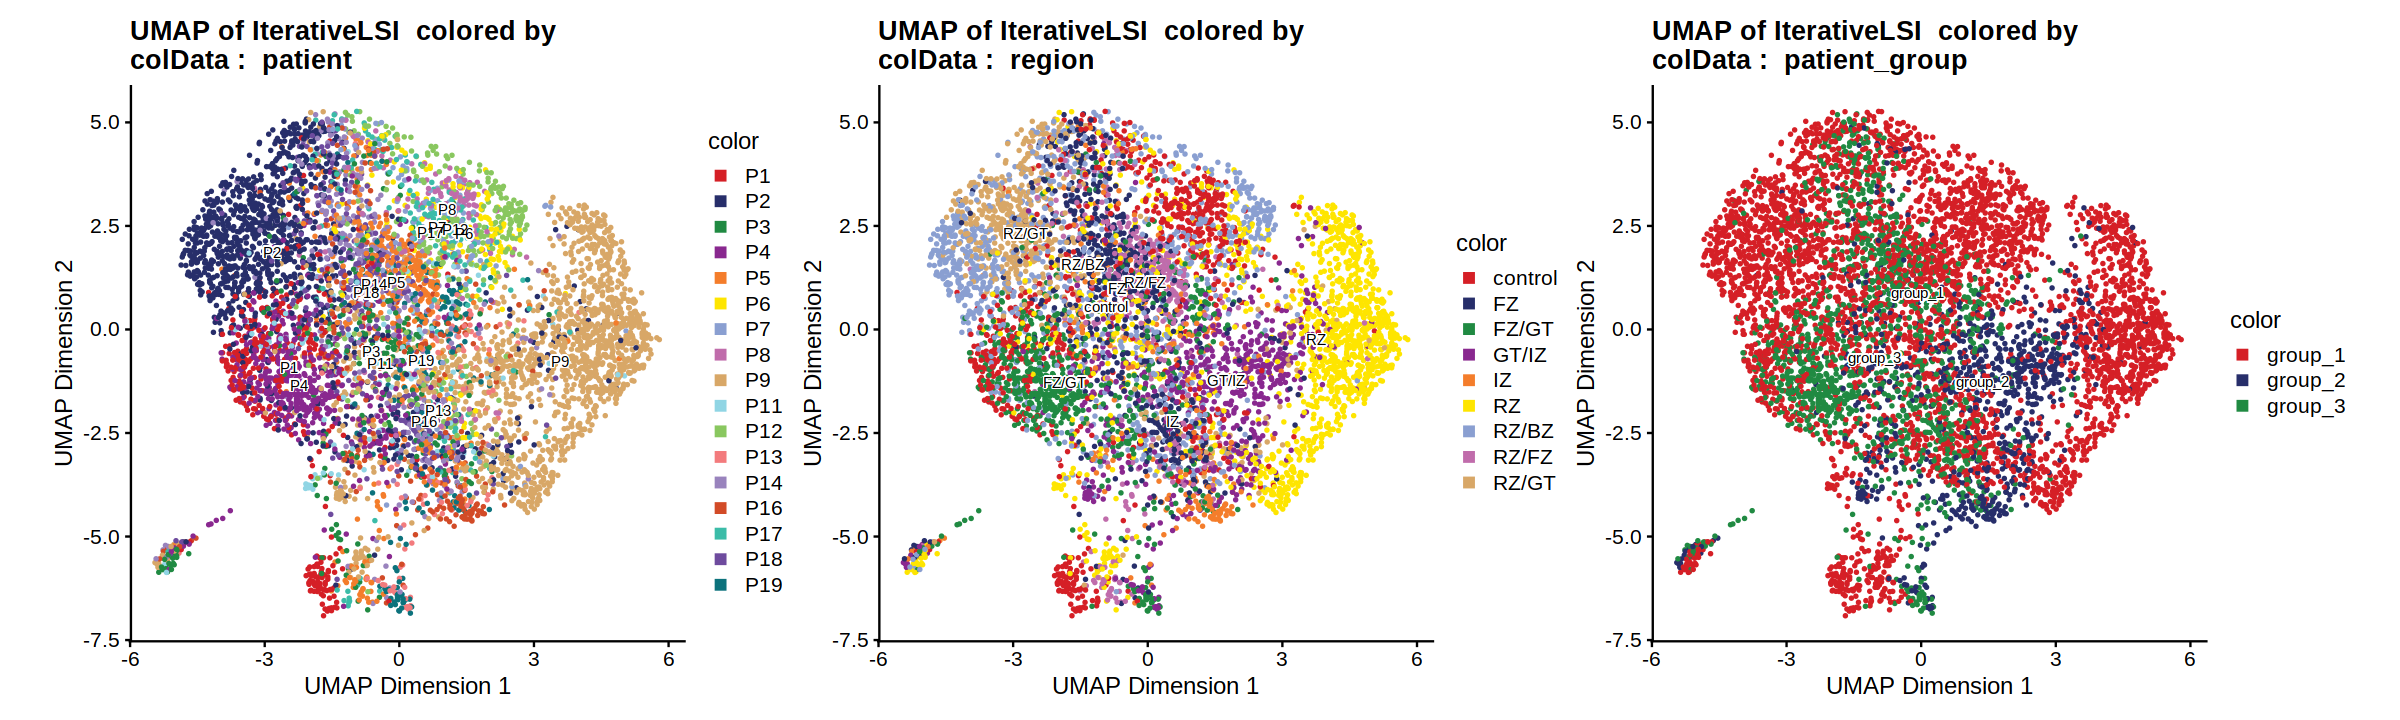

In [9]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [10]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = c("patient", "Sample", "region"),
    force = TRUE
)

proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "Harmony", 
    name = "UMAP_Harmony", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations

19:58:54 Creating temp model dir /tmp/RtmpDUiz0E/dir2a8487429d2393

19:58:54 Creating dir /tmp/RtmpDUiz0E/dir2a8487429d2393

19:58:55 Changing to /tmp/RtmpDUiz0E/dir2a8487429d2393

19:58:55 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Endothelial/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-Harmony-2a848720c4bfa5-Date-2021-11-16_Time-19-58-54.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a8487578428b-Date-2021-11-16_Time-19-59-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a8487578428b-Date-2021-11-16_Time-19-59-02.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84871282469d-Date-2021-11-16_Time-19-59-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a84871282469d-Date-2021-11-16_Time-19-59-02.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84873b0b3a35-Date-2021-11-16_Time-19-59-03.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a84873b0b3a35-Date-2021-11-1

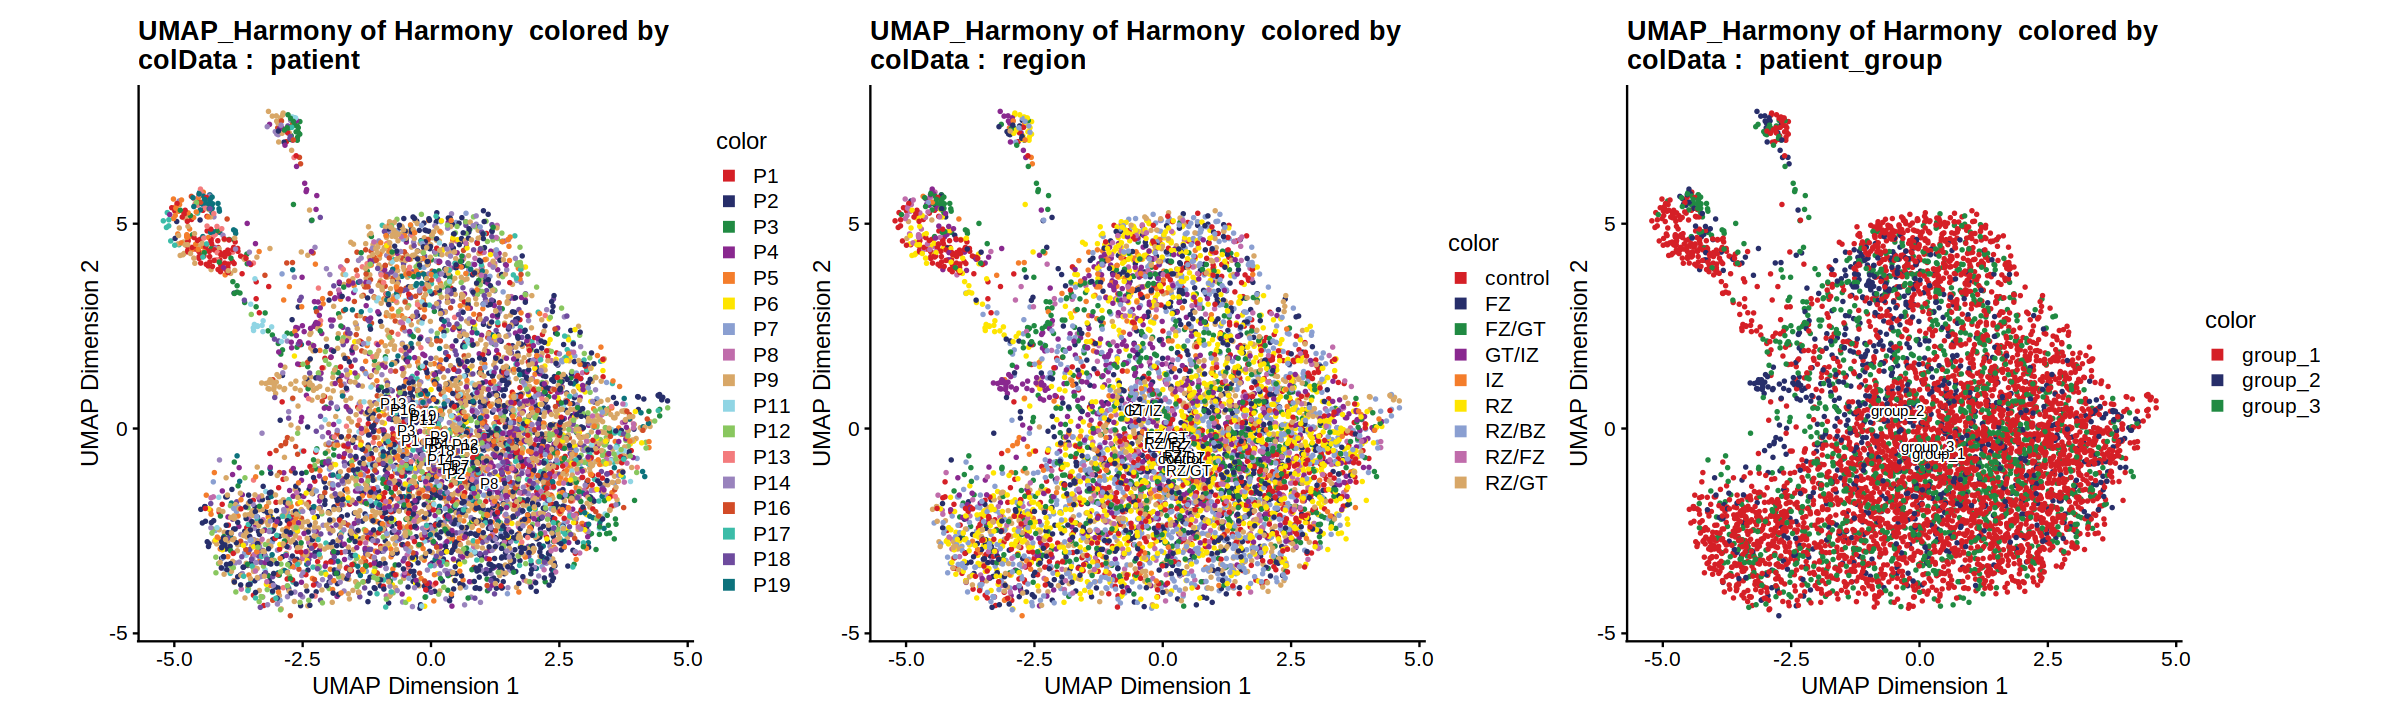

In [11]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [14]:
proj <- addImputeWeights(proj, reducedDims = "Harmony")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-2f40a1492f06c7-Date-2021-11-13_Time-18-58-06.log
If there is an issue, please report to github with logFile!

2021-11-13 18:58:06 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84874cbe36f-Date-2021-11-16_Time-20-02-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-16 20:02:27 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 


Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a84874cbe36f-Date-2021-11-16_Time-20-02-27.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84873acac071-Date-2021-11-16_Time-20-02-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-16 20:02:29 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 


Plotting Embedding

1 


ArchR logg

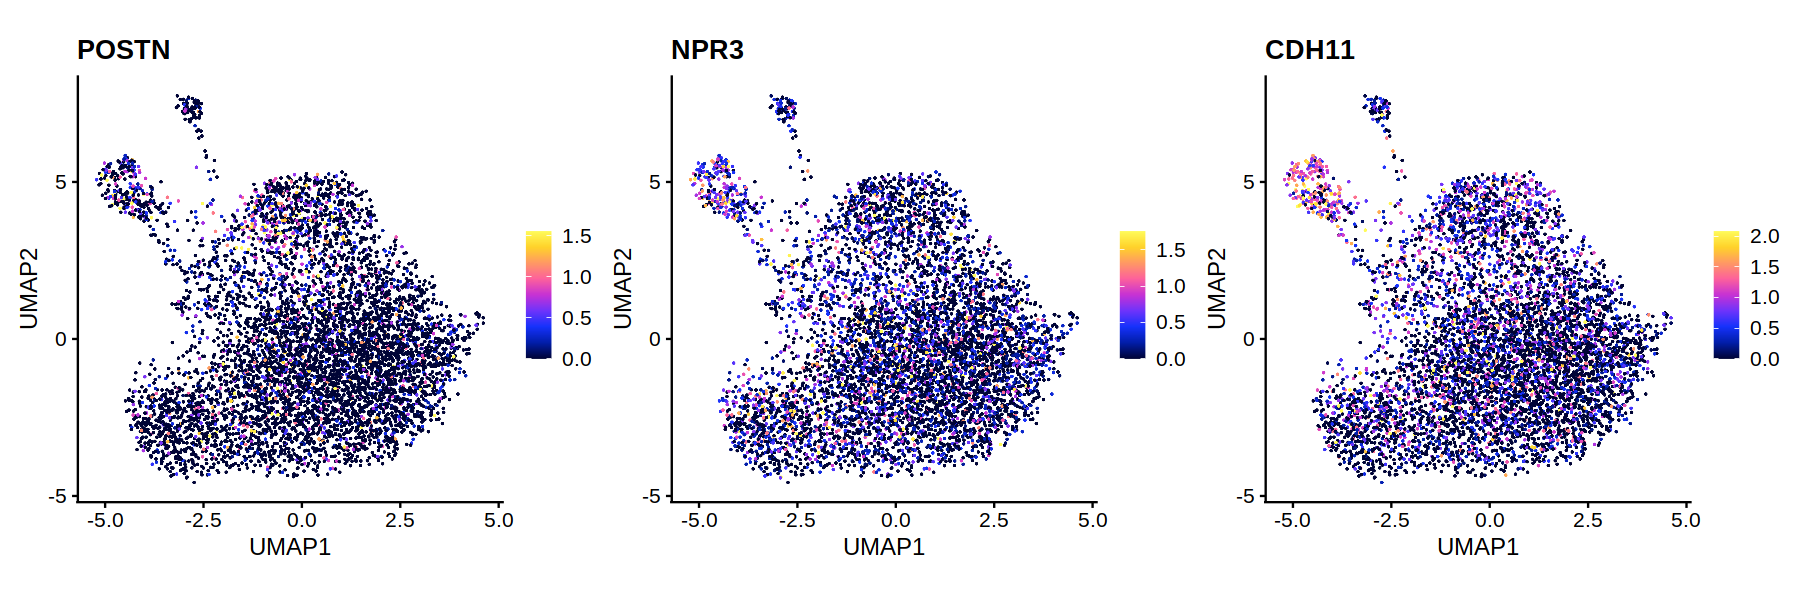

In [13]:
p1 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "POSTN",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
    xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("POSTN") +
    theme(legend.title = element_blank())

p2 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "NPR3",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("NPR3") +
        theme(legend.title = element_blank())

p3 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "CDH11",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("CDH11") +
        theme(legend.title = element_blank())


p4 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "PROX1",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("PROX1") +
        theme(legend.title = element_blank())

p5 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "TBX1",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("TBX1") +
        theme(legend.title = element_blank())

p6 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "PDPN",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("PDPN") +
        theme(legend.title = element_blank())

options(repr.plot.height = 12, repr.plot.width = 20)

patchwork::wrap_plots(list(p1, p2, p3, p4, p5, p6), nrow = 2)

ArchR logging to : ArchRLogs/ArchR-addClusters-2a84872e519d7-Date-2021-11-16_Time-20-03-03.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2021-11-16 20:03:03 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6495
Number of edges: 254250

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8140
Number of communities: 7
Elapsed time: 0 seconds


2021-11-16 20:03:13 : Testing Outlier Clusters, 0.165 mins elapsed.

2021-11-16 20:03:13 : Assigning Cluster Names to 7 Clusters, 0.165 mins elapsed.

2021-11-16 20:03:13 : Finished addClusters, 0.167 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2a84872fcc3afd-Date-2021-11-16_Time-20-03-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2a84872fcc3afd-Date-2021-11-16_Time-20-03-13.log



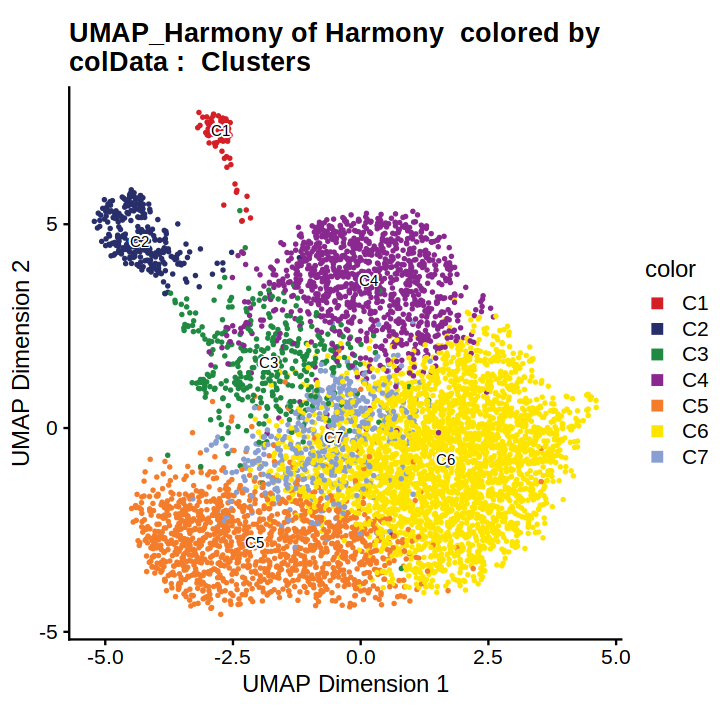

In [14]:
## clustering
proj <- addClusters(
    input = proj,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters",
    resolution = 0.4,
    force = TRUE
)

p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "Clusters", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.height = 6, repr.plot.width = 6)

p1

In [15]:
table(proj@cellColData$Clusters)


  C1   C2   C3   C4   C5   C6   C7 
  79  259  366 1029 1279 2980  503 

In [16]:
cM <- confusionMatrix(paste0(proj$Clusters), paste0(proj$Sample))
cM

   [[ suppressing 25 column names ‘CK171’, ‘CK167’, ‘CK380’ ... ]]



7 x 25 sparse Matrix of class "dgCMatrix"
                                                                              
C6 298 215 47 37 79 157 492 138 67 40 88 60 63 316 88 98 77 77 20 57 31 81 259
C3  25  15 18 13 14  12  19  26 19 12  . 11  1   9  3  4  6  2 39  2 13 18  35
C5 136  68 13 19 40  76 219  65 31 21 44 29 30 139 29 44 20 32  6 44 10 36  99
C4  82  62 18 23 35  22 188  79 67  3 23 26 19  69 21 30 29 15 12 30 17 35  89
C7  48  39 16 22 20  27  54  20 34  5 11  8 13  29 15 10 18 12 22 13  8 11  20
C1   1   1  2  8  6   3   4   4  7 16  1  .  .   1  .  .  .  .  6  1  1  4  12
C2   .  35  1  . 10  81  27   1  7 18 11  1  1   3  .  . 30  .  .  . 21  7   5
        
C6 43 52
C3 26 24
C5 15 14
C4 17 18
C7 21  7
C1  .  1
C2  .  .

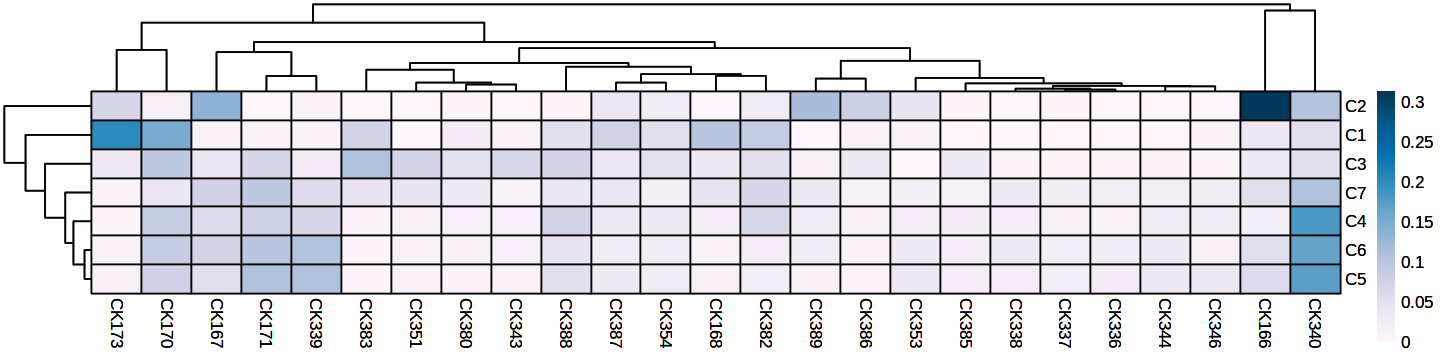

In [18]:
options(repr.plot.width = 12, repr.plot.height = 3)

library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
p

In [20]:
meta.data <- as.data.frame(proj@cellColData)

In [21]:
cols <- ArchR::paletteDiscrete(meta.data$Clusters)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.



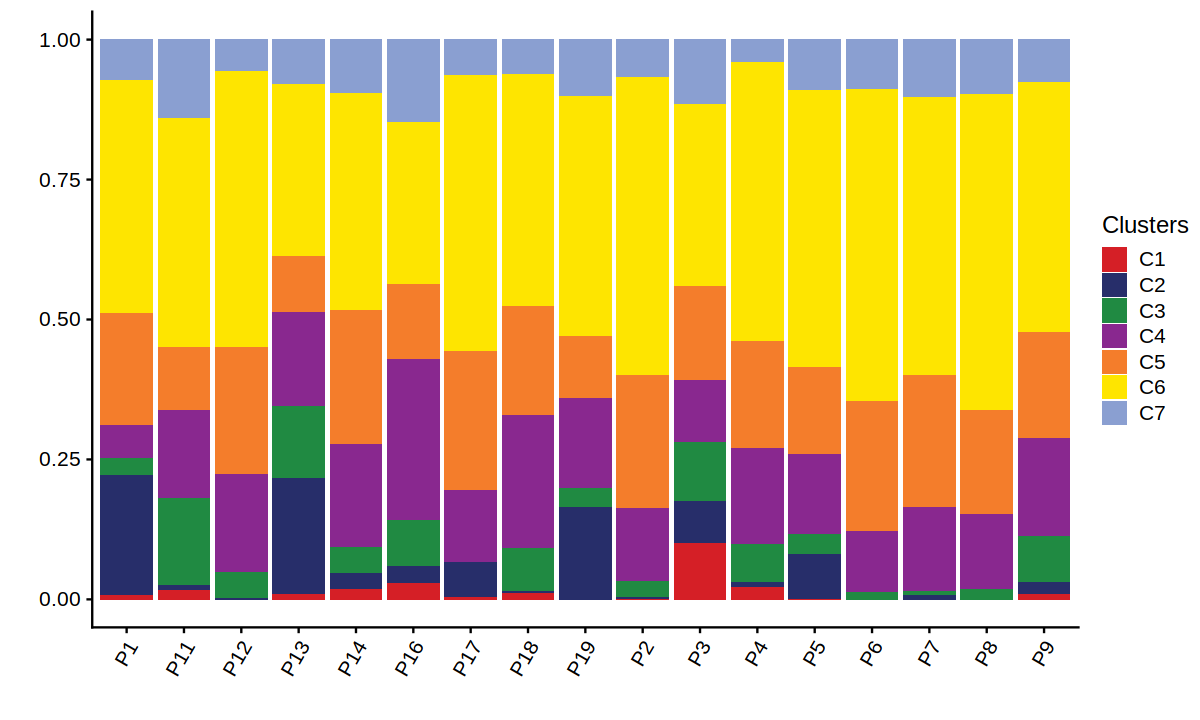

In [22]:
df_plot <- meta.data %>%
    group_by(patient, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



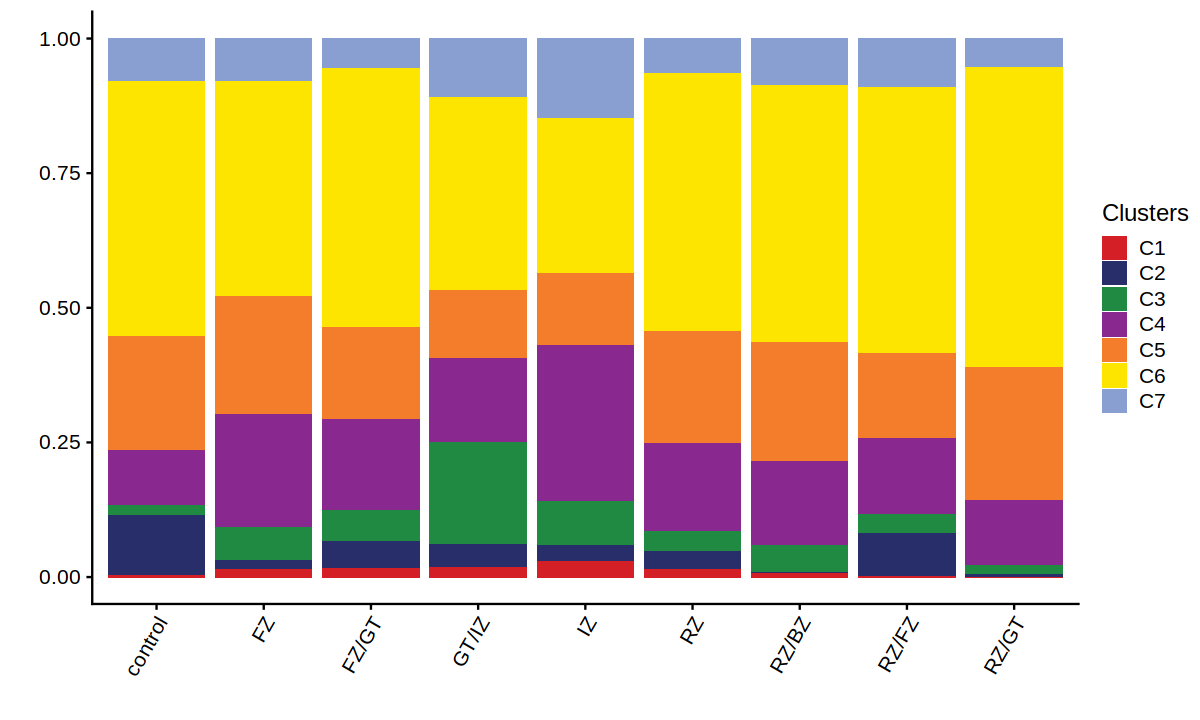

In [23]:
df_plot <- meta.data %>%
    group_by(region, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(region, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.



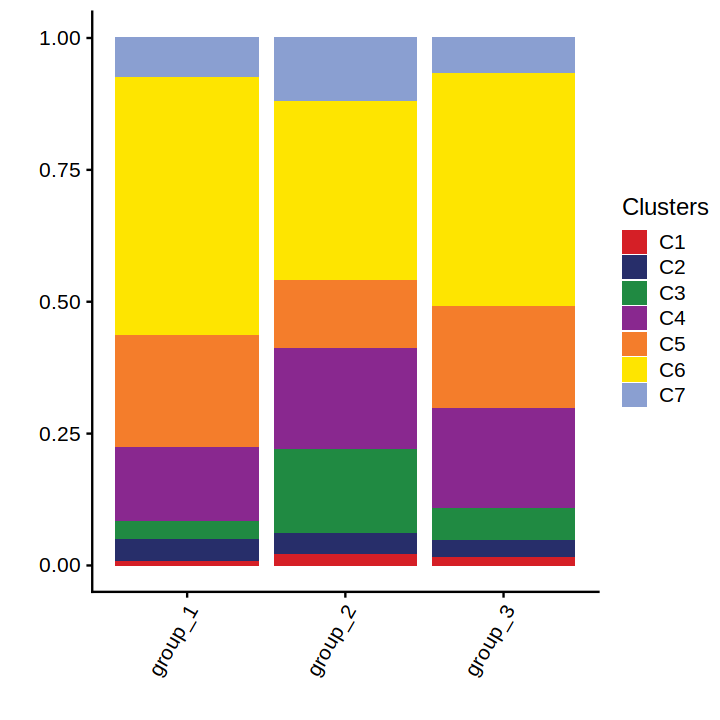

In [24]:
df_plot <- meta.data %>%
    group_by(patient_group, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient_group, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 6, repr.plot.height = 6)

p1

In [ ]:
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)

In [15]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.0.3/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                gridExtra_2.3              
 [3] uwot_0.1.10                 cowplot_1.1.1              
 [5] dplyr_1.0.7                 harmony_1.0                
 [7] Rcpp_1.0.7                  Signac_1.4.0               
 [9] SeuratObject_4.0.2  